# 1 - packages and set up

In [2]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

## Make dataset for linear regression

In [6]:
# def make_dataset_for_linear_regression(n_samples, n_features):
    
#     return X, y
m = 100

In [7]:
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=10)
print(f'X: {X}')
print(f'y: {y}')

X: [[ 0.30399528]
 [ 0.51882369]
 [ 1.92611723]
 [-1.53293584]
 [ 0.43023286]
 [ 0.39840438]
 [ 1.4984663 ]
 [ 0.25071734]
 [-0.6900408 ]
 [-0.10837705]
 [-0.01309413]
 [-1.39412721]
 [ 0.52082926]
 [-0.84360173]
 [ 0.82371538]
 [ 1.48562465]
 [-0.47430903]
 [-0.07982877]
 [-0.7308842 ]
 [ 1.02120264]
 [-0.29422144]
 [-0.12219938]
 [ 0.06212988]
 [ 0.97268931]
 [-0.06417931]
 [-0.42100319]
 [ 0.80090049]
 [ 0.83247588]
 [-0.23366035]
 [ 2.25231349]
 [ 0.13235905]
 [ 0.5250514 ]
 [-0.67374404]
 [ 1.15917601]
 [-0.69349582]
 [ 0.76714073]
 [ 1.21683969]
 [ 0.46492654]
 [-1.64972401]
 [ 0.37793672]
 [-0.51820029]
 [-0.00546501]
 [-1.38943074]
 [ 1.8489023 ]
 [ 1.21022211]
 [-0.72088068]
 [ 0.2935177 ]
 [ 0.01948768]
 [-1.2036092 ]
 [ 0.47422841]
 [ 0.68769021]
 [-0.39739312]
 [-0.09975343]
 [-0.76335575]
 [ 0.9776869 ]
 [-1.03698719]
 [ 0.45001125]
 [-2.29779715]
 [ 1.90053477]
 [ 0.97469891]
 [-1.14129709]
 [-1.28375992]
 [-1.88171172]
 [-0.14896498]
 [-0.27845335]
 [-2.73004983]
 [ 0.04

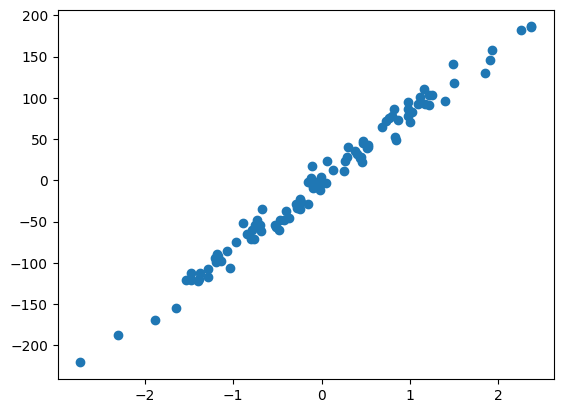

In [8]:
plt.scatter(X, y)

# 2 - Compute Cost

In [9]:
def compute_cost(x, y, w, b):
    
    n_samples = x.shape[0]
    cost = 0
    
    for sample in range(n_samples):
        f_wb = w * x[sample] + b
        cost = cost + (y[sample] - f_wb)**2
    cost = 1/n_samples * cost
    return cost

In [10]:
cost =  compute_cost(X, y, 10, 5)
print(cost)

[5800.05396758]


# 3 - Compute Gradient

In [11]:
def compute_gradient(x, y, w, b):
    
    n_samples = x.shape[0]
    dw, db = 0, 0
    
    for sample in range(n_samples):
        dw += ((w*x[sample] + b) - y[sample]) * x[sample]
        db += (w*x[sample] + b) - y[sample]
    dw = dw/n_samples
    db = db/n_samples
    return dw, db

In [12]:
dw, db = compute_gradient(X, y, 100, 5)
print(f'dw: {dw}')
print(f'db: {db}')

dw: [19.41621754]
db: [5.85473747]


# 4 - Gradient Descent

In [13]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    
    j_his = []
    p_his = []
    w = w_in
    b = b_in
    
    for i in range(num_iters):
        dw, db = gradient_function(x, y, w, b)
        
        w = w - alpha * dw
        b = b - alpha * db
        
        if i<100000:      # prevent resource exhaustion 
            j_his.append(cost_function(x, y, w, b))
            p_his.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i%1000 == 0:
            print(f"Iteration {i}: Cost {j_his[-1]} ",
                  f"dj_dw: {dw}, dj_db: {db}  ",
                  f"w: {w}, b:{b}")
    
    return w, b, j_his, p_his

In [14]:
w_init = 2
b_init = 1
iters = 10000
alpha = 1.0e-3
w_final, b_final, J_hist, p_hist = gradient_descent(X ,y, w_init, b_init, alpha, 
                                                    iters, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final},{b_final})")

Iteration 0: Cost [7078.87756994]  dj_dw: [-87.1023558], dj_db: [1.75187184]   w: [2.08710236], b:[0.99824813]
Iteration 1000: Cost [902.19866815]  dj_dw: [-29.36002687], dj_db: [0.6763861]   w: [55.15706805], b:[-0.13192759]
Iteration 2000: Cost [200.31024149]  dj_dw: [-9.89656293], dj_db: [0.2595683]   w: [73.04565015], b:[-0.56712574]
Iteration 3000: Cost [120.54781766]  dj_dw: [-3.33590638], dj_db: [0.09910415]   w: [79.07547192], b:[-0.7337655]
Iteration 4000: Cost [111.4832088]  dj_dw: [-1.1244625], dj_db: [0.03767455]   w: [81.1079909], b:[-0.79726943]
Iteration 5000: Cost [110.45300266]  dj_dw: [-0.37903377], dj_db: [0.01426885]   w: [81.79311062], b:[-0.82137164]
Iteration 6000: Cost [110.33591042]  dj_dw: [-0.12776527], dj_db: [0.00538685]   w: [82.02405117], b:[-0.83048743]
Iteration 7000: Cost [110.32260077]  dj_dw: [-0.04306752], dj_db: [0.002028]   w: [82.10189711], b:[-0.83392472]
Iteration 8000: Cost [110.32108774]  dj_dw: [-0.01451741], dj_db: [0.00076162]   w: [82.128

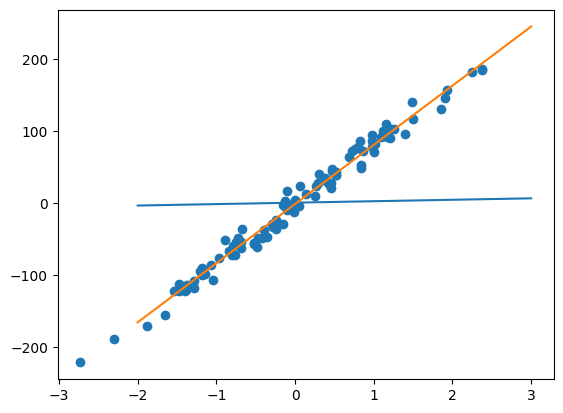

In [15]:
plt.scatter(X, y)

x_plot = [-2, 3]

predict1 = w_init * x_plot[0] + b_init
predict2 = w_init * x_plot[1] + b_init
predictions_plot = [predict1, predict2]
plt.plot(x_plot, predictions_plot)

predict3 = p_hist[-1][0] * x_plot[0] + p_hist[-1][1]
predict4 = p_hist[-1][0] * x_plot[1] + p_hist[-1][1]
predictions_plot = [predict3, predict4]

plt.plot(x_plot, predictions_plot)